In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from math import sqrt

## Генерируем бета-распределение с n = 1000

In [2]:
a = 2
b = 3
dist = sts.beta(a, b)
dist_sample = dist.rvs(size = 1000)
#print dist_sample
print 'mean: ', round(dist_sample.mean(), 5)
print 'sd: ', round(dist_sample.std(), 5)

mean:  0.39745
sd:  0.20231


### Рисуем теоретическое и эмпирическое распределения

C:\Users\Eugene\Anaconda3\envs\python_2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'pdf')

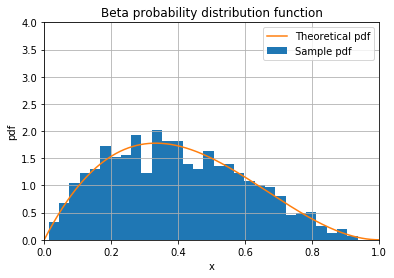

In [3]:
plt.hist(dist_sample, bins = 30, normed = True, label = 'Sample pdf')
x = np.linspace(0,1,1000)
pdf = dist.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 1, 0, 4])
plt.title('Beta probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

### Генерируем 1000 выборок последовательно n = 5, 10, 50

In [4]:
#количество выборок
gen_num = 1000

#количество n
sample_num = [5, 10, 50]

# создадим заготовку под выборочные средние

sample_means = np.zeros((len(sample_num), gen_num))

# заполним массив выборочными средними значениями

for i in xrange(len(sample_num)):
    for j in xrange(gen_num):
        dist_sample_temp = np.array(dist.rvs(size = sample_num[i]))
        dst_mean = dist_sample_temp.mean()
        sample_means[i, j] = dst_mean
                                    
print sample_means

[[0.52514838 0.46007059 0.41757423 ... 0.35268249 0.45637031 0.41295964]
 [0.36998859 0.38400274 0.47149    ... 0.30552707 0.46614265 0.53430782]
 [0.45498818 0.39277953 0.40928159 ... 0.38536002 0.37380188 0.40471155]]


### Через циклы нарисуем три гистограммы распределения

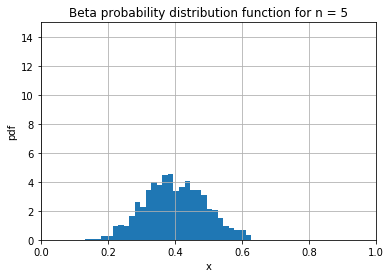

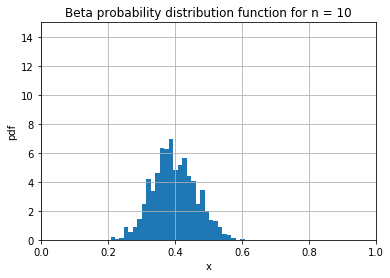

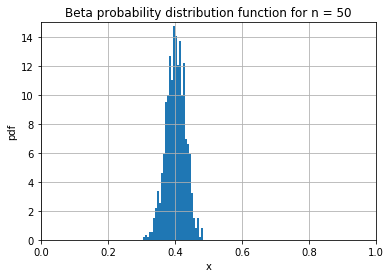

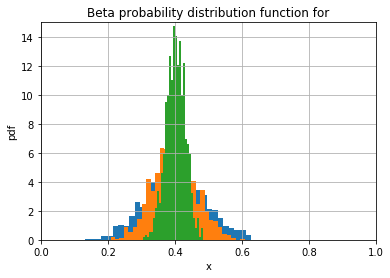

In [5]:
#три гистограммы последовательно
for i in xrange(len(sample_num)):
    plt.hist(sample_means[i], bins = 30, normed = True)
    plt.grid()
    plt.axis([0, 1, 0, 15])
    plt.title('Beta probability distribution function for n = ' + str(sample_num[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()

#нарисуем наложенные гистограммы
for i in xrange(len(sample_num)):
    plt.hist(sample_means[i], bins = 30, normed = True, label = 'n = ' + str(sample_num[i]))
    plt.grid()
    plt.axis([0, 1, 0, 15])
    plt.title('Beta probability distribution function for')
    plt.xlabel('x')
    plt.ylabel('pdf')

### Вычисляем нормальные распределения, которые приближают распределения выборочных средних

In [6]:
# рассчитаем автоматически среднее и дисперсию для бета-распределения
mean, var = sts.beta.stats(a, b, moments='mv')

# формула среднего для бета-распределения: 
# print a/(a+b)

# формула дисперсии для бета-распределения
#print (a*b)/(((a + b)**2)*(a + b + 1))

print 'Математическое ожидание: ', mean

#рассчитаем дисперсии для n = 5, 10, 50

dist_sample_var = np.zeros(len(sample_num))

for i in xrange(len(sample_num)):
    dist_sample_var[i] = var/sample_num[i]

for i in xrange(len(sample_num)):
    print 'Дисперсия для n = ' + str(sample_num[i]) + ': ' + str(dist_sample_var[i])

Математическое ожидание:  0.4
Дисперсия для n = 5: 0.008
Дисперсия для n = 10: 0.004
Дисперсия для n = 50: 0.0008


### Рисуем плотности нормальных распределений поверх соответствующих гистограмм

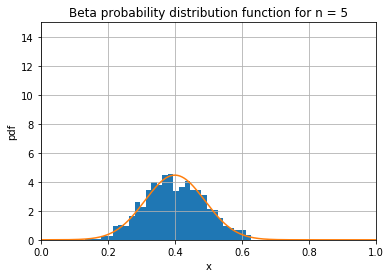

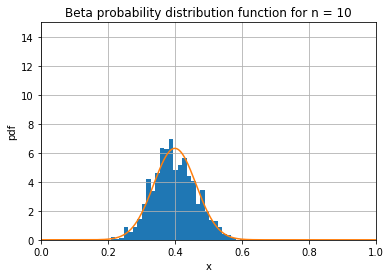

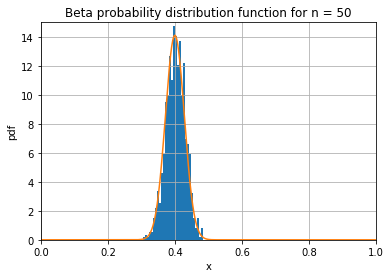

In [7]:
#три гистограммы последовательно
for i in xrange(len(sample_num)):
    plt.hist(sample_means[i], bins = 30, normed = True)
    plt.grid()
    plt.axis([0, 1, 0, 15])
    plt.title('Beta probability distribution function for n = ' + str(sample_num[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')

#создадим нормальные величины
    
    mu = mean
    sigma = sqrt(dist_sample_var[i])
    norm = sts.norm(loc = mu, scale = sigma)
    x = np.linspace(0, 1, 1000)
    pdf = norm.pdf(x)
    plt.plot(x, pdf)
    plt.show()

Распределение выборочных средних бета-распределения относительно хорошо описывается нормальным распределением, что следует из центральной предельной теоремы. Чем больше n, тем лучше аппроксимация.